In [1]:
import sys
sys.path.append('../src')

XML_PATH = '../data/drugbank_partial.xml'

from parsing import parse_drugbank_xml

root = parse_drugbank_xml(XML_PATH)

# Task #1

In [2]:
from transformations import build_drugs_dataframe

df_drugs = build_drugs_dataframe(root)
df_drugs.head(10)

,drugbank_id,name,type,description,form,indication,mechanism_of_action,food_interactions
0,DB00001,Lepirudin,biotech,Lepirudin is a recombinant hirudin formed by 6...,solid,Lepirudin is indicated for anticoagulation in ...,Lepirudin is a direct thrombin inhibitor used ...,Avoid herbs and supplements with anticoagulant...
1,DB00002,Cetuximab,biotech,Cetuximab is a recombinant chimeric human/mous...,liquid,Cetuximab indicated for the treatment of local...,The epidermal growth factor receptor (EGFR) is...,
2,DB00003,Dornase alfa,biotech,Dornase alfa is a biosynthetic form of human d...,liquid,Used as adjunct therapy in the treatment of cy...,Dornase alfa is a biosynthetic form of human D...,
3,DB00004,Denileukin diftitox,biotech,A recombinant DNA-derived cytotoxic protein co...,liquid,For treatment of cutaneous T-cell lymphoma,Denileukin diftitox binds to the high-affinity...,
4,DB00005,Etanercept,biotech,Dimeric fusion protein consisting of the extra...,liquid,Etanercept is indicated for the treatment of m...,There are two distinct receptors for TNF (TNFR...,
5,DB00006,Bivalirudin,small molecule,Bivalirudin is a synthetic 20 residue peptide ...,solid,For treatment of heparin-induced thrombocytope...,Inhibits the action of thrombin by binding bot...,Avoid echinacea.; Avoid herbs and supplements ...
6,DB00007,Leuprolide,small molecule,Leuprolide is a synthetic 9-residue peptide an...,solid,Leuprolide is indicated for the treatment of a...,Gonadotropin-releasing hormone (GnRH) is a nat...,
7,DB00008,Peginterferon alfa-2a,biotech,Peginterferon alfa-2a is a form of recombinant...,liquid,Peginterferon alfa-2a is indicated for the tre...,Peginterferon alfa-2a is derived from recombin...,Drink plenty of fluids.
8,DB00009,Alteplase,biotech,Alteplase is a recombinant tissue plasminogen ...,liquid,Alteplase is indicated for the treatment of ac...,Alteplase is a recombinant tissue plasminogen ...,Avoid herbs and supplements with anticoagulant...
9,DB00010,Sermorelin,biotech,Sermorelin acetate is the acetate salt of an a...,liquid,"For the treatment of dwarfism, prevention of H...",Sermorelin binds to the growth hormone releasi...,


# Task #2

In [3]:
from transformations import build_synonyms_dataframe

df_synonyms = build_synonyms_dataframe(root)
df_synonyms.head(10)

,drugbank_id,synonym
0,DB00001,"[Leu1, Thr2]-63-desulfohirudin"
1,DB00001,Desulfatohirudin
2,DB00001,Hirudin variant-1
3,DB00001,Lepirudin
4,DB00001,Lepirudin recombinant
5,DB00001,R-hirudin
6,DB00002,Cetuximab
7,DB00002,Cétuximab
8,DB00002,Cetuximabum
9,DB00003,Deoxyribonuclease (human clone 18-1 protein mo...


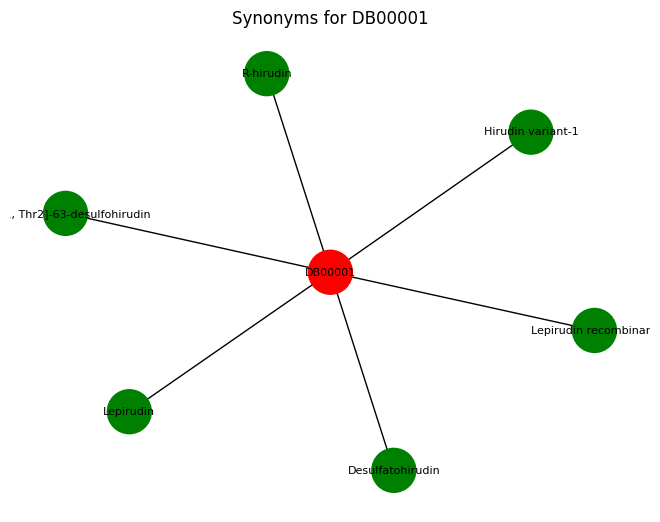

In [4]:
from visualizations import draw_synonym_graph

example_drug_id = df_synonyms["drugbank_id"].unique()[0]

draw_synonym_graph(example_drug_id, df_synonyms)

# Task #3

In [5]:
from transformations import build_products_dataframe

df_products = build_products_dataframe(root)
df_products.head(10)

,drugbank_id,product_name,labeller,ndc_product_code,dosage_form,route,strength,country,source
0,DB00001,Refludan,Bayer,50419-150,Powder,Intravenous,50 mg/1mL,US,FDA NDC
1,DB00001,Refludan,Bayer,,"Powder, for solution",Intravenous,50 mg / vial,Canada,DPD
2,DB00001,Refludan,Celgene Europe Limited,,"Injection, solution, concentrate",Intravenous,50 mg,EU,EMA
3,DB00001,Refludan,Celgene Europe Limited,,"Injection, solution, concentrate",Intravenous,50 mg,EU,EMA
4,DB00001,Refludan,Celgene Europe Limited,,"Injection, solution, concentrate",Intravenous,20 mg,EU,EMA
5,DB00001,Refludan,Celgene Europe Limited,,"Injection, solution, concentrate",Intravenous,20 mg,EU,EMA
6,DB00002,Erbitux,ImClone LLC,66733-948,Solution,Intravenous,2 mg/1mL,US,FDA NDC
7,DB00002,Erbitux,ImClone LLC,66733-958,Solution,Intravenous,2 mg/1mL,US,FDA NDC
8,DB00002,Erbitux,"Imclone, Llc",,Solution,Intravenous,2 mg / mL,Canada,DPD
9,DB00002,Erbitux,Merck Europe B.V.,,"Injection, solution",Intravenous,5 mg/ml,EU,EMA


# Task #4

We can just go through each drug and find pathways interacting with it. This way we will find all of them.

In [6]:
from transformations import build_pathways_dataframe 
# TODO: think if the dataframe from task 5 would be better, as it has more information albeit allows to answer this as well.

df_pathways = build_pathways_dataframe(root)
df_pathways.head(15)

,pathway_name,smpdb-id
0,Lepirudin Action Pathway,SMP0000278
1,Cetuximab Action Pathway,SMP0000474
2,Bivalirudin Action Pathway,SMP0000277
3,Alteplase Action Pathway,SMP0000280
4,Urokinase Action Pathway,SMP0000284
5,Reteplase Action Pathway,SMP0000285
6,Anistreplase Action Pathway,SMP0000281
7,Tenecteplase Action Pathway,SMP0000283
8,Abciximab Action Pathway,SMP0000265
9,Eptifibatide Action Pathway,SMP0000266


In [7]:
from analyses import count_unique_pathways

count_unique_pathways(df_pathways)

12

# Task #5

It's enough that we iterate over every single drug, and then inside the `<pathways>` we go through each an every `<pathway>`. Each pathway has a list of drugs that interact with it. This has to be done this way, as pathways might have drugs interacting with them that are outside of the scope of our partial data.

In [8]:
from transformations import build_pathways_to_drugs_dataframe

df_pathways_to_drugs = build_pathways_to_drugs_dataframe(root)
df_pathways_to_drugs.head(30)

,pathway_name,drugbank_id,smpdb-id
0,Lepirudin Action Pathway,DB00001,SMP0000278
1,Lepirudin Action Pathway,DB01022,SMP0000278
2,Lepirudin Action Pathway,DB01373,SMP0000278
3,Cetuximab Action Pathway,DB00002,SMP0000474
4,Bivalirudin Action Pathway,DB00006,SMP0000277
5,Bivalirudin Action Pathway,DB01022,SMP0000277
6,Bivalirudin Action Pathway,DB01373,SMP0000277
7,Alteplase Action Pathway,DB00009,SMP0000280
8,Alteplase Action Pathway,DB01022,SMP0000280
9,Alteplase Action Pathway,DB01373,SMP0000280


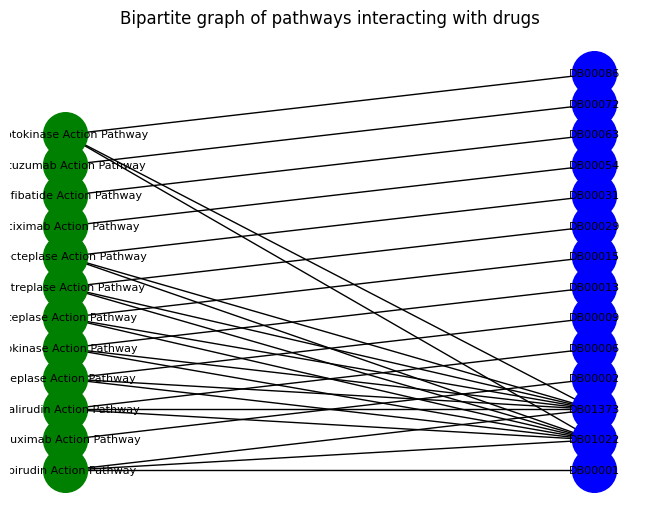

In [9]:
from visualizations import draw_pathway_drug_bipartite

draw_pathway_drug_bipartite(df_pathways_to_drugs)

# Task #6

We could either do this task for each drug in partial_xml, or for each drug mentioned in drugs interacting with pathways in partial_xml (that's what we will do for now):

In [10]:
from analyses import count_pathways_per_drug

df_pathways_count_per_drug = count_pathways_per_drug(df_pathways_to_drugs)
df_pathways_count_per_drug

,drugbank_id,num_pathways
0,DB00001,1
1,DB00002,1
2,DB00006,1
3,DB00009,1
4,DB00013,1
5,DB00015,1
6,DB00029,1
7,DB00031,1
8,DB00054,1
9,DB00063,1


Now let's draw the histogram

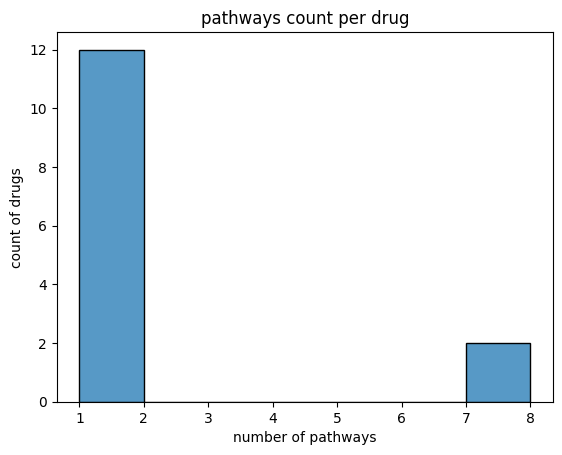

In [11]:
from visualizations import draw_histogram_pathways_per_drug

draw_histogram_pathways_per_drug(df_pathways_count_per_drug)

# Task #7

In [12]:
from transformations import build_targets_dataframe

df_targets = build_targets_dataframe(root)
df_targets.tail(10)

,drugbank_id,target_id,external_id,external_source,polypeptide_name,gene_name,genatlas_id,chromosome_location,cellular_location
239,DB00102,BE0000852,P16234,Swiss-Prot,Platelet-derived growth factor receptor alpha,PDGFRA,PDGFRA,4,Cell membrane
240,DB00102,BE0000910,P01023,Swiss-Prot,Alpha-2-macroglobulin,A2M,A2M,12,Secreted
241,DB00105,BE0000385,P48551,Swiss-Prot,Interferon alpha/beta receptor 2,IFNAR2,IFNAR2,21,Membrane
242,DB00105,BE0000661,P17181,Swiss-Prot,Interferon alpha/beta receptor 1,IFNAR1,IFNAR1,21,Membrane
243,DB00106,BE0000203,P30968,Swiss-Prot,Gonadotropin-releasing hormone receptor,GNRHR,GNRHR,4,Cell membrane
244,DB00107,BE0000844,P30559,Swiss-Prot,Oxytocin receptor,OXTR,OXTR,3,Cell membrane
245,DB00108,BE0000590,P13612,Swiss-Prot,Integrin alpha-4,ITGA4,ITGA4,2,Membrane
246,DB00108,BE0000901,O75015,Swiss-Prot,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,FCGR3B,1,Cell membrane
247,DB00108,BE0000710,P12314,Swiss-Prot,High affinity immunoglobulin gamma Fc receptor I,FCGR1A,FCGR1A,1,Cell membrane
248,DB00108,BE0001085,P05362,Swiss-Prot,Intercellular adhesion molecule 1,ICAM1,ICAM1,19,Membrane


# Task #8

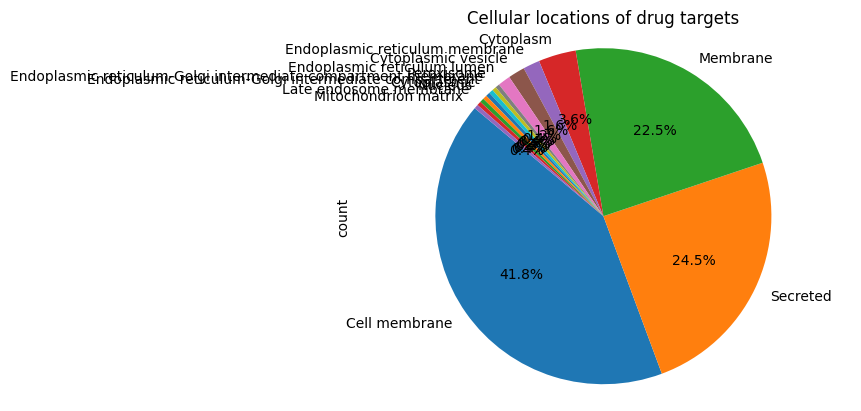

In [13]:
from visualizations import draw_pie_cellular_locations

draw_pie_cellular_locations(df_targets)

# Task #9

In [14]:
from transformations import build_groups_dataframe

df_groups = build_groups_dataframe(root)
df_groups.head(10)

,drugbank_id,group
0,DB00001,approved
1,DB00001,withdrawn
2,DB00002,approved
3,DB00003,approved
4,DB00004,approved
5,DB00004,investigational
6,DB00005,approved
7,DB00005,investigational
8,DB00006,approved
9,DB00006,investigational


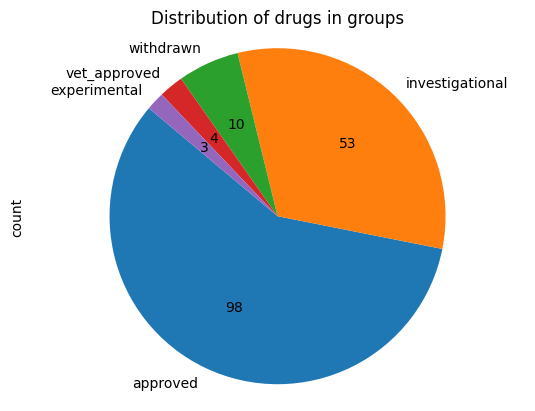

In [15]:
from visualizations import draw_pie_chart_groups

draw_pie_chart_groups(df_groups)

In [16]:
from analyses import approved_and_non_withdrawn_drugs

approved_and_non_withdrawn_drugs(df_groups)

89

# Task #10

In [17]:
from transformations import build_drug_interactions_dataframe

df_actions = build_drug_interactions_dataframe(root)
df_actions.head(10)

,drugbank_id,other_drugbank_id,description
0,DB00001,DB06605,Apixaban may increase the anticoagulant activi...
1,DB00001,DB06695,Dabigatran etexilate may increase the anticoag...
2,DB00001,DB01254,The risk or severity of bleeding and hemorrhag...
3,DB00001,DB01609,The risk or severity of gastrointestinal bleed...
4,DB00001,DB01586,The risk or severity of bleeding and bruising ...
5,DB00001,DB02123,The risk or severity of bleeding and bruising ...
6,DB00001,DB02659,The risk or severity of bleeding and bruising ...
7,DB00001,DB02691,The risk or severity of bleeding and bruising ...
8,DB00001,DB03619,The risk or severity of bleeding and bruising ...
9,DB00001,DB04348,The risk or severity of bleeding and bruising ...


# Task #11

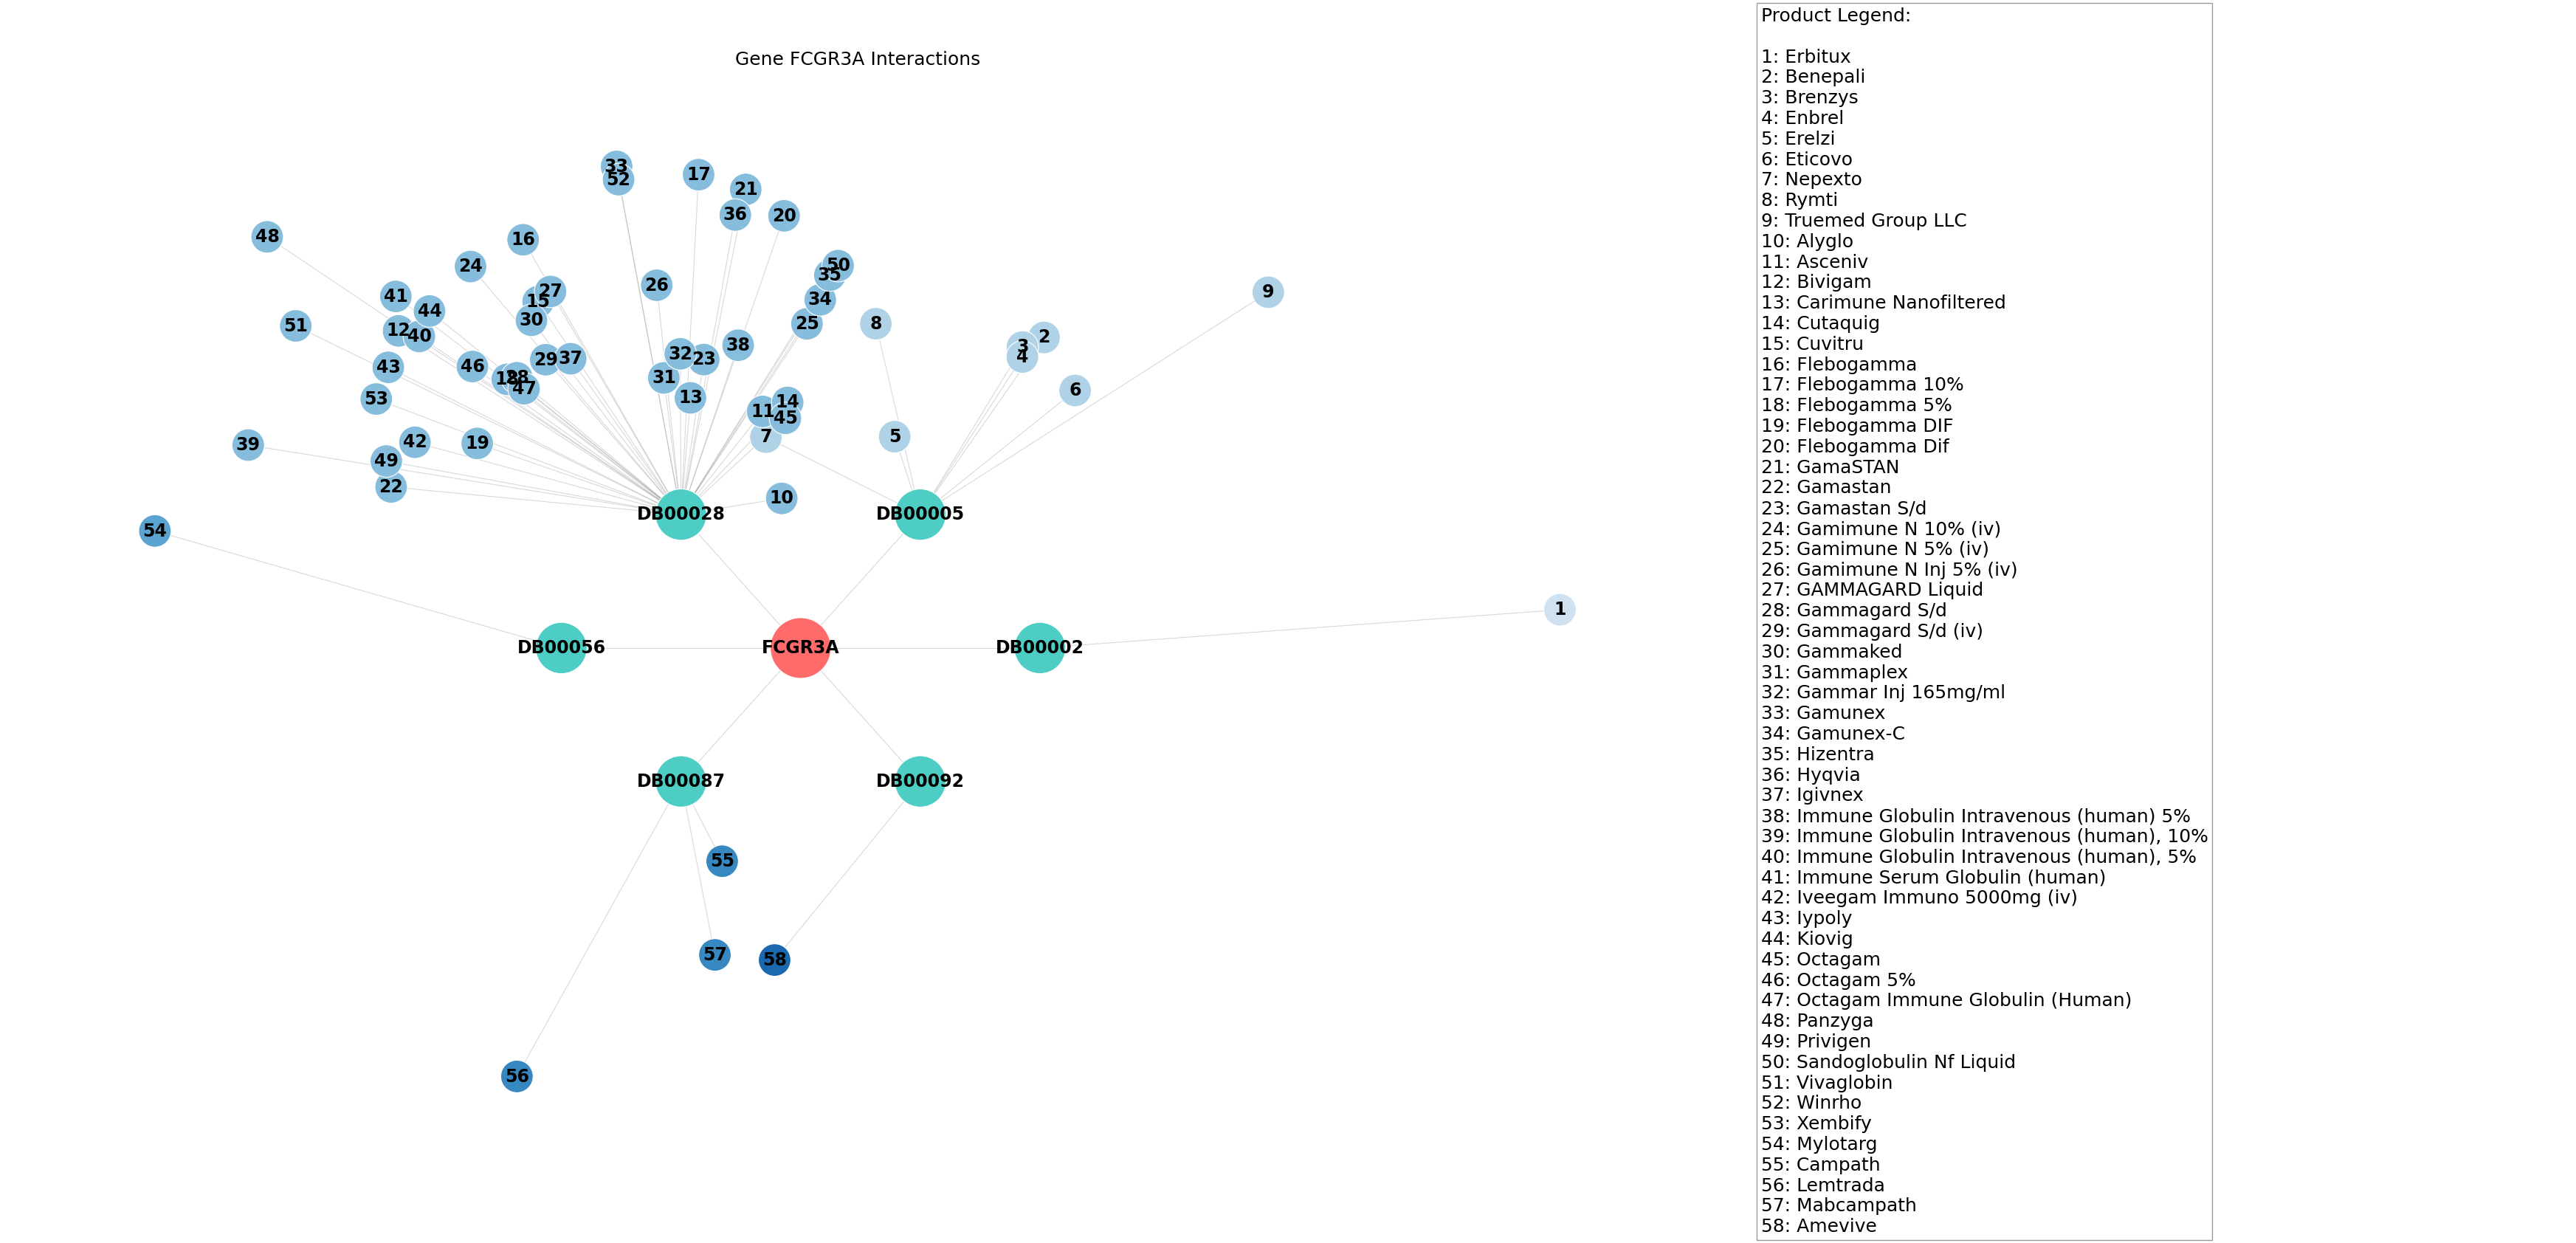

In [18]:
from visualizations import draw_gene_drug_product_graph

some_gene = df_targets['gene_name'].dropna().unique()[6]
draw_gene_drug_product_graph(some_gene, df_targets, df_products) # TODO: make the visualization look more structured (maybe a tree-like structure with gene being the root)

# Task #12

In [19]:
# FIXME

# Task #13

In [20]:
# from simulator import generate_drugs

# XML_PATH_OUT = '../data/drugbank_partial_and_generated.xml'
# generate_drugs(XML_PATH, XML_PATH_OUT, 300) # for now we are testing a smaller number of drugs
# # TODO: run the analysis again on the generated synthetic data

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7e47a44a7790>>
Traceback (most recent call last):
  File "/home/tomek/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


# Task #14

Test files are placed in `../tests/` folder.

In [ ]:
!pytest ../tests/ --maxfail=1 --disable-warnings -q

.....F
=================================== FAILURES ===================================
____________________ test_build_pathways_to_drugs_dataframe ____________________

    def test_build_pathways_to_drugs_dataframe():
        # 1) Create mock objects to represent the nested structure:
        root_mock = Mock()        # This simulates the "root"
        drug_mock = Mock()        # This simulates <drug>
        pathway_mock = Mock()     # This simulates <pathway>
        pathway_drug_mock = Mock()# This simulates <drugs><drug>
    
        # 2) root.findall(...) => [drug_mock]
        #    i.e., "for drug in root.findall('...')" sees one drug element
        root_mock.findall.return_value = [drug_mock]
    
        # 3) drug.findall(...) => [pathway_mock]
        #    i.e., "pathways = drug.findall('...')" sees one pathway element
        drug_mock.findall.return_value = [pathway_mock]
    
        # 4) We must handle pathway.findtext(...) for <name> and <smpdb-id>
        #    Also, 

# Task #15

In [ ]:
import requests

url = 'http://0.0.0.0:8000/pathways/'
drug_id_payload = {'drugbank_id': 'DB00001'}

ans = None
try:
    response = requests.post(url, json=drug_id_payload)
    if response.status_code == 200:
        ans = response.json()
    else:
        print('Error:', response.status_code)
except Exception as e:
    print('Error:', e)

ans

Error: HTTPConnectionPool(host='0.0.0.0', port=8000): Max retries exceeded with url: /pathways/ (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7bb73e935210>: Failed to establish a new connection: [Errno 111] Connection refused'))
